In [1]:
import os
import numpy as np

PATH_IN = r'C:\Users\MI2RL-KHJ\workspace_signal\ECG_PTT_Sample'
#os.listdir(PATH_IN)
ecg = ['Afib_ECG.npy', 'Normal_ECG.npy', 'VPC1_ECG.npy', 'VPC2_ECG.npy']

In [2]:
raw_Afib = np.load(os.path.join(PATH_IN, ecg[0]))
raw_Normal= np.load(os.path.join(PATH_IN, ecg[1]))
raw_VPC1= np.load(os.path.join(PATH_IN, ecg[2]))
raw_VPC2= np.load(os.path.join(PATH_IN, ecg[3]))

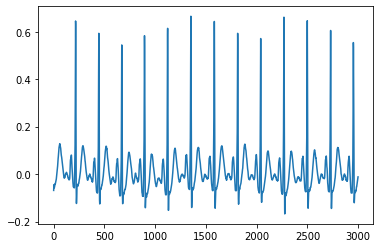

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline
#plt.plot(raw_Normal[1][int(1.95*1e7+6000):int(1.95*1e7+9000)])#[40000:50000])
#plt.plot(raw_Normal[1][int(1.95*1e7+6000):int(1.95*1e7+9000)])#[40000:50000])
plt.plot(raw_Normal[1][int(1.95*1e5+6000):int(1.95*1e5+9000)])#[40000:50000])

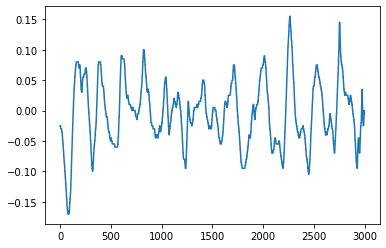

In [7]:
%matplotlib inline
plt.plot(raw_Afib[1][int(1.95*1e7+6000):int(1.95*1e7+9000)])#[40000:50000])

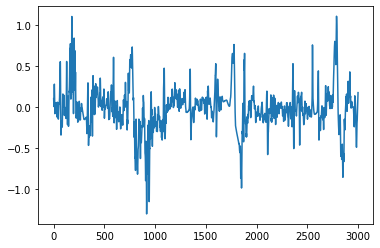

In [8]:
%matplotlib inline
plt.plot(raw_VPC1[1][int(1.95*1e6+6000):int(1.95*1e6+9000)])#[40000:50000])

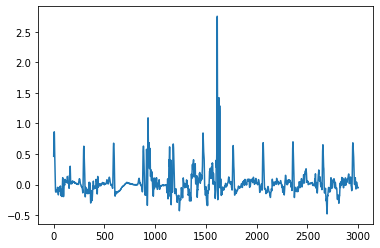

In [11]:
%matplotlib inline
plt.plot(raw_VPC2[1][int(1.95*1e6+6000):int(1.95*1e6+9000)])#[40000:50000])

In [12]:
import numpy as np
from biosppy.signals import ecg

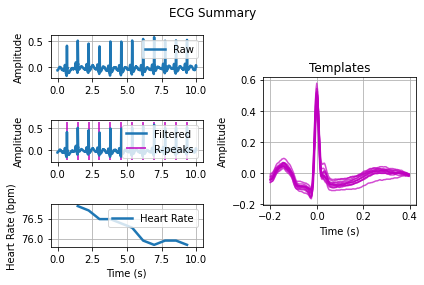

In [14]:
# load raw ECG signal
# signal = np.loadtxt('./examples/ecg.txt')

# process it and plot
out = ecg.ecg(signal=raw_Normal[1][int(1.95*1e6+6000):int(1.95*1e6+9000)], sampling_rate=300, show=True)

In [15]:
tmp_signal = raw_Normal[1][int(1.95*1e6+6000):int(1.95*1e6+9000)]

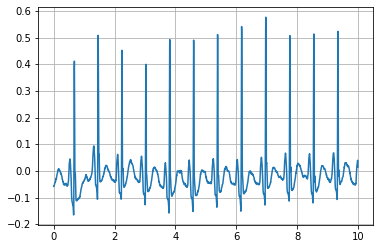

In [17]:
%matplotlib inline
figure = plt.plot()
signal=tmp_signal
Fs = 300
N = len(signal) # number of samples
T = (N - 1) / Fs  # duration
ts = np.linspace(0, T, N, endpoint=False)  # relative timestamps
plt.plot(ts, signal)
plt.grid()
plt.show()

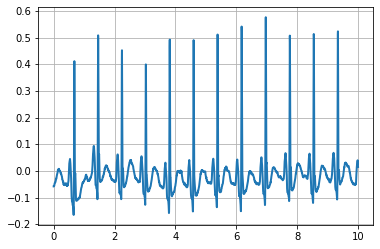

In [18]:
%matplotlib inline
fig2 = plt.figure()
signal=tmp_signal
Fs = 300
N = len(signal) # number of samples
T = (N - 1) / Fs  # duration
ts = np.linspace(0, T, N, endpoint=False)  # relative timestamps
plt.plot(ts, signal, lw=2)
plt.grid()
plt.show()

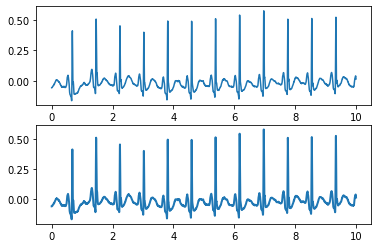

In [19]:
signal=tmp_signal
Fs = 300
N = len(signal) # number of samples
T = (N - 1) / Fs  # duration
ts = np.linspace(0, T, N, endpoint=False) 

fig, (ax0, ax1) = plt.subplots(2, 1)
ax0.plot(ts, signal)
ax1.plot(ts, signal, lw=2)

In [ ]:
#list(tmp_signal)

### Date: 2021.06.15 

In [20]:
#os.listdir(path)
import pandas as pd 

path = os.chdir(r'C:\Users\MI2RL-KHJ\anaconda3\envs\ecg_env')
tmp_rpeaks = pd.read_csv('rpeaks_3000.csv', header=None)

In [21]:
r_peaks = list(tmp_rpeaks[0])
r_peaks

[204, 438, 673, 908, 1144, 1379, 1615, 1852, 2090, 2327, 2563, 2801]

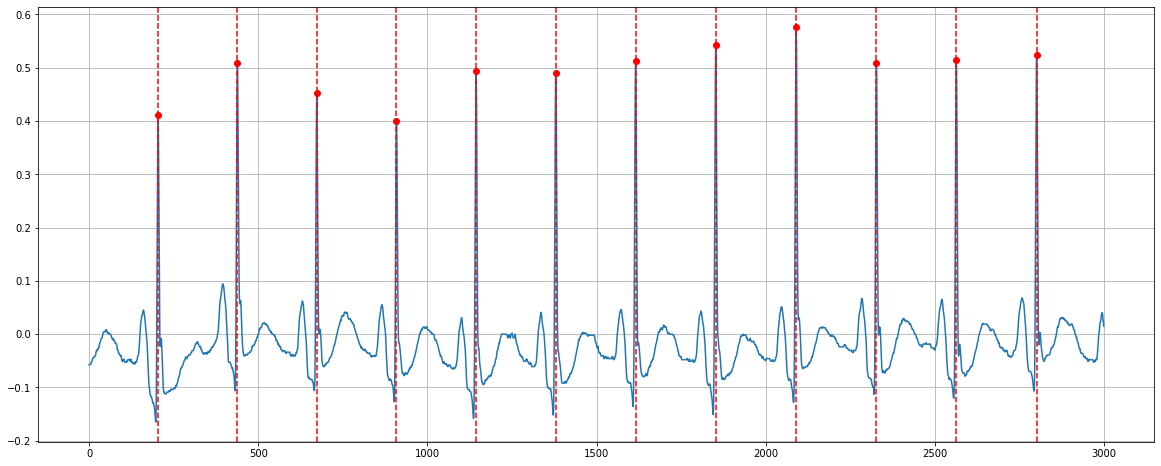

In [22]:
# 일부구간 r-peak에 대한 marker,avline 

import matplotlib.pyplot as plt

%matplotlib inline
xvals = range(len(list(tmp_signal)))
yvals2 = [tmp_signal[i] for i in r_peaks]

fig = plt.figure(figsize=(20, 8))
ax = fig.subplots(1)
ax.plot(xvals, list(tmp_signal))
ax.plot(r_peaks, yvals2, 'ro')
ax.grid()
for r_peak in r_peaks:
    plt.axvline(x=r_peak, linestyle='--', c='r')

In [ ]:
# compare signal with filtered signal

# load files for filtered signal
filtered = pd.read_csv('filtered_3000.csv', header=None)
filtered = list(filtered[0])

# plot 
xvals = range(len(list(tmp_signal)))

f, ax = plt.subplots(1)
ax.plot(xvals, list(tmp_signal), 'b')
ax.plot(xvals, filtered, 'r:')

# tmp_signal - np.array(filtered)

In [24]:
# template 12(r-peak) * 180(time|duration )

templates = pd.read_csv('templates_3000.csv', header=None)

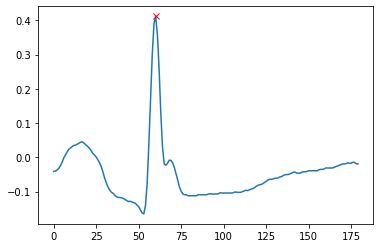

In [25]:
# plotting 1-template
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
fig, ax = plt.subplots(1)
ax.plot(templates.loc[0])
ymax = max(templates.loc[0])
xpos = list(templates.loc[0]).index(ymax)
xmax = list(templates.loc[0])[xpos]
ax.plot(xpos, ymax, 'rx')


In [27]:
# yvals2= rpeaks, ymax = 1st rpeak 
yvals2 = [tmp_signal[i] for i in r_peaks]
#yvals2, ymax

In [28]:
import glob
for filename in glob.glob('*.csv'):
    print(filename)

filtered.csv
filtered_3000.csv
raw_signal.csv
rpeaks_3000.csv
templates_3000.csv
ts_3000.csv
ts_tmpl_3000.csv


In [29]:
# load -ts 
ts = pd.read_csv('ts_tmpl_3000.csv', header=None)
x_axis = list(ts[0]) #0.596667
#x_axis

In [ ]:
len(templates)#.loc[1]

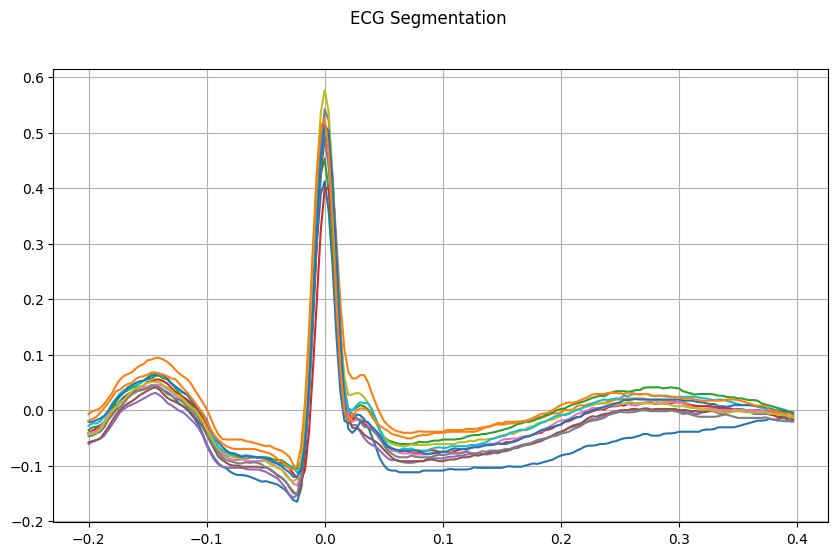

In [33]:
%matplotlib inline
fig = plt.figure(figsize=(10,6), dpi=100)
fig.suptitle('ECG Segmentation')
plt.grid(True)
#plt.axvline(0, color='gray', linestyle='--', linewidth='2', grid=True)

for i in range(len(templates)):
    y_vals = list(templates.loc[i])
    plt.plot(x_axis, y_vals)


## MinMax-Normalization

In [90]:
from sklearn.preprocessing import minmax_scale

minmax_norm_cor = [] 
for i in range(len(templates)):
    #print(i)
    tmpl_MinMax_scaled = minmax_scale(templates.loc[i], axis=0, copy=True)
    minmax_norm_cor.append(tmpl_MinMax_scaled)
    #print(tmpl_MinMax_scaled)


In [94]:
minmax_norm_cor = pd.DataFrame(minmax_norm_cor)
minmax_norm_cor

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.214905,0.216638,0.221837,0.230503,0.244367,0.261698,0.284229,0.299827,0.313692,0.327556,...,0.253033,0.253033,0.254766,0.258232,0.256499,0.256499,0.261698,0.259965,0.253033,0.253033
1,0.160976,0.169106,0.172358,0.178862,0.190244,0.206504,0.222764,0.245528,0.261789,0.273171,...,0.165854,0.167480,0.164228,0.160976,0.157724,0.152846,0.154472,0.151220,0.149593,0.149593
2,0.125224,0.134168,0.135957,0.141324,0.152057,0.173524,0.194991,0.216458,0.234347,0.246869,...,0.220036,0.211091,0.207513,0.203936,0.200358,0.196780,0.193202,0.189624,0.184258,0.182469
3,0.163188,0.170778,0.178368,0.185958,0.195446,0.214421,0.229602,0.248577,0.265655,0.280835,...,0.240987,0.239089,0.231499,0.225806,0.223909,0.218216,0.218216,0.220114,0.218216,0.214421
4,0.149002,0.155146,0.159754,0.164363,0.172043,0.187404,0.202765,0.219662,0.236559,0.245776,...,0.231951,0.231951,0.231951,0.233487,0.236559,0.242704,0.236559,0.228879,0.222734,0.216590
5,0.146190,0.149300,0.152411,0.157076,0.172628,0.188180,0.206843,0.223950,0.236392,0.247278,...,0.233281,0.233281,0.233281,0.233281,0.230171,0.231726,0.222395,0.216174,0.214619,0.209953
6,0.146605,0.148148,0.152778,0.162037,0.177469,0.195988,0.209877,0.217593,0.228395,0.236111,...,0.208333,0.206790,0.206790,0.206790,0.200617,0.200617,0.199074,0.195988,0.191358,0.189815
7,0.150072,0.151515,0.157287,0.161616,0.173160,0.191919,0.204906,0.217893,0.225108,0.236652,...,0.197691,0.197691,0.199134,0.196248,0.193362,0.190476,0.190476,0.189033,0.189033,0.187590
8,0.119149,0.121986,0.124823,0.133333,0.148936,0.164539,0.178723,0.190071,0.201418,0.208511,...,0.175887,0.175887,0.175887,0.171631,0.173050,0.170213,0.168794,0.168794,0.164539,0.163121
9,0.136876,0.143317,0.143317,0.149758,0.162641,0.180354,0.201288,0.215781,0.230274,0.239936,...,0.191626,0.188406,0.185185,0.181965,0.181965,0.181965,0.181965,0.177134,0.172303,0.170692


In [95]:
len(minmax_norm_cor[1])

12

In [98]:
len(x_axis)

180

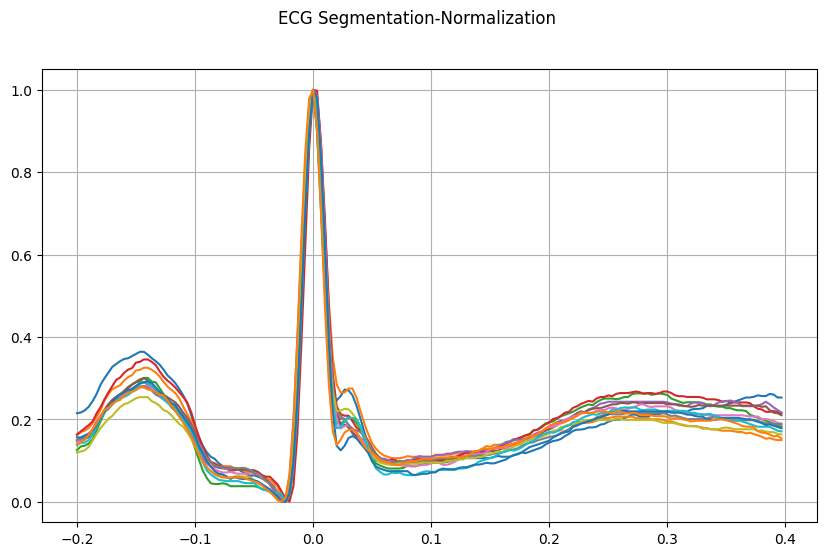

In [101]:
%matplotlib inline
x_axis = list(ts[0])

fig = plt.figure(figsize=(10,6), dpi=100)
fig.suptitle('ECG Segmentation-Normalization')
plt.grid(True)
#plt.axvline(0, color='gray', linestyle='--', linewidth='2', grid=True)

#plt.plot(x_axis, minmax_norm_cor.loc[1])
#plt.plot(x_axis, minmax_norm_cor.loc[2])

for i in range(len(minmax_norm_cor)):
    y_vals = list(minmax_norm_cor.loc[i])
    plt.plot(x_axis, y_vals)

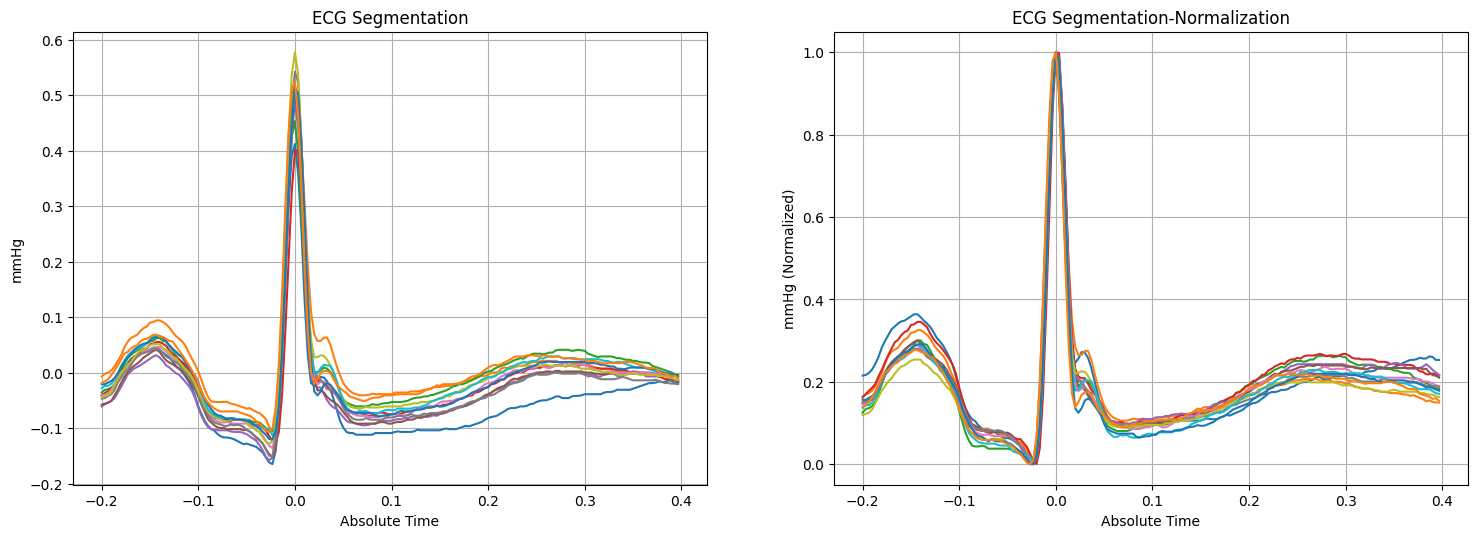

In [118]:
%matplotlib inline

fig, axs = plt.subplots(1,2, figsize=(18,6), dpi=100)
axs[0].grid()
axs[0].set_ylabel('mmHg')
axs[0].set_xlabel('Absolute Time')

axs[1].grid()
axs[1].set_ylabel('mmHg (Normalized)')
axs[1].set_xlabel('Absolute Time')


for i in range(len(templates)):
    y_vals = list(templates.loc[i])
    axs[0].plot(x_axis, y_vals)    
    axs[0].set_title('ECG Segmentation')
    
for i in range(len(minmax_norm_cor)):
    y_vals = list(minmax_norm_cor.loc[i])
    axs[1].plot(x_axis, y_vals)
    axs[1].set_title('ECG Segmentation-Normalization')
    

In [131]:
# dist base 지점 만들기
dist_base = [] 
for i in range(len(minmax_norm_cor.loc[0])):
    dist_tmp = np.mean(minmax_norm_cor[i])
    dist_base.append(dist_tmp)

In [149]:
# Way1: to get similarity using Euclidean distance
def dist(x,dist_q):   
    return np.sqrt(np.sum((x-y)**2))

ecl_dists = []
for i in range(len((minmax_norm_cor))):
    ecl_dist = dist(np.array(minmax_norm_cor.loc[i]), dist_base)
    ecl_dists.append(ecl_dist) 

In [162]:
# Way2: to get similarity using Euclidean distance
from sklearn.metrics.pairwise import euclidean_distances

euclidean_dist = []
# get distance to origin
for i in range(len((minmax_norm_cor))):
    euclidean_dist.append(euclidean_distances(np.array([minmax_norm_cor.loc[i]]), np.array([dist_base])))

In [191]:
name = [ '{}-seg'.format(i+1) for i in range(len(ecl_dists))]

In [193]:
x_axis_ecl = [ i+1 for i in range(len(ecl_dists))]

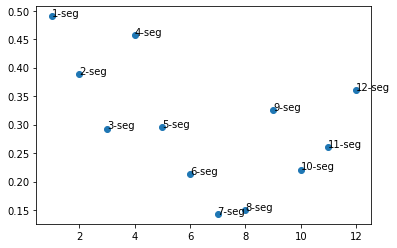

In [208]:
plt.scatter(x_axis_ecl, ecl_dists)

for i, annotation in enumerate(name):
    plt.annotate(annotation, (x_axis_ecl[i], ecl_dists[i]))